# CPUFreq and scheduler Analysis

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup(level=100)

In [2]:
%matplotlib inline

import os

# Support to access the remote target
from env import TestEnv

# Support to access cpuidle information from the target
from devlib import *

# Support to configure and run RTApp based workloads
from wlgen import RTA, Ramp

# Support for trace events analysis
from trace import Trace
from trace import ResidencyTime, ResidencyData

# DataFrame support
import pandas as pd
from pandas import DataFrame

# Trappy (plots) support
import trappy
from trappy import ILinePlot
from trappy.stats.grammar import Parser

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Hikey960 Platform Configurations

In [3]:
# Setup target configuration
hikey960_conf = {
    "platform"     : 'generic_linux',
    "board"        : 'hikey960',
    "results_dir"  : "test",
    "modules"      : [ 'cpufreq', 'cpuidle' ],
    "ftrace"       : {
        "events" : [ "cpu_idle", "cpu_capacity", "cpu_frequency", "sched_switch", "sched_load_avg_cpu" ],
        "buffsize" : 100 * 1024,
    },
    "tools"        : [ 'trace-cmd', 'taskset', 'rt-app', 'sysbench' ],
}

In [4]:
hikey960_platform = {
    'kernel': {
        'major': 4,
        'sha1': '78e8b90',
        'version': '57 SMP PREEMPT Sat Jul 1 15:42:00 CST 2017',
        'version_number': 14,
        'parts': [4, 14, 74],
        'rc': None,
        'release': '4.4.74-g78e8b90',
        'minor': 74
    },
    
    'freqs': {
        'big':    [ 903000, 1421000, 1805000, 2112000, 2362000 ],
        'little': [ 533000,  999000, 1402000, 1709000, 1844000 ]
    },
    
    'nrg_model': {
        'big': {
            'cluster': {
                'nrg_max': 433
            },
            'cpu': {
                'cap_max': 1024,
                'nrg_max': 2848
            }
        },
        'little': {
            'cluster': {
                'nrg_max': 144
            },
            'cpu': {
                'cap_max': 462,
                'nrg_max': 502
            }
        }
    },
    
    'clusters': {
        'big'    : [4, 5, 6, 7],
        'little' : [0, 1, 2, 3]
    },
    'cpus_count': 8,
    'topology': [[0, 1, 2, 3], [4, 5, 6, 7]]
}

# Test case 1: Android

## Read trace data before optimization

In [5]:
res_dir = '/home/leoy/Work2/Develop/wa-data/daniell'
trace_file = os.path.join(res_dir, "trace-android-4.14.dat")

In [6]:
trace = Trace(hikey960_platform, trace_file, events=hikey960_conf['ftrace']['events'], normalize_time=True)

(1.0264038013583476, 1.421)

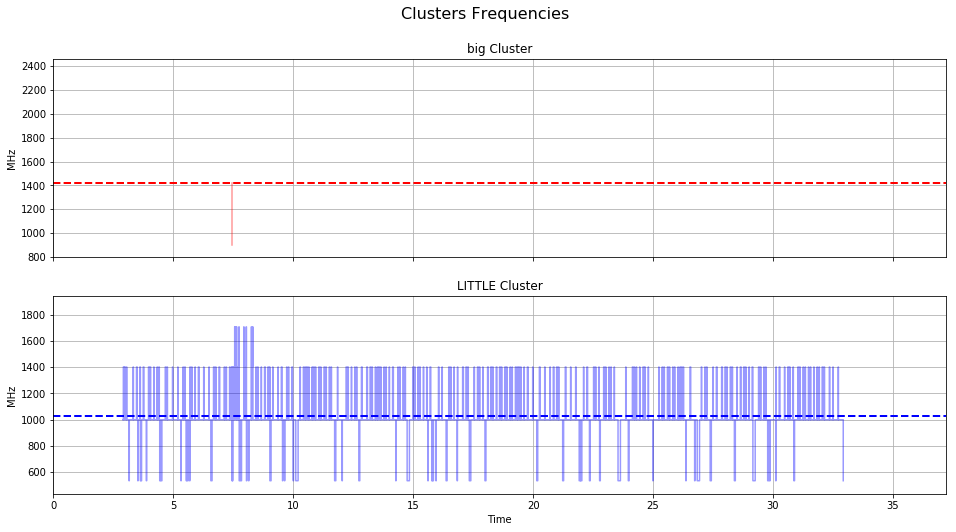

In [7]:
trace.analysis.frequency.plotClusterFrequencies()

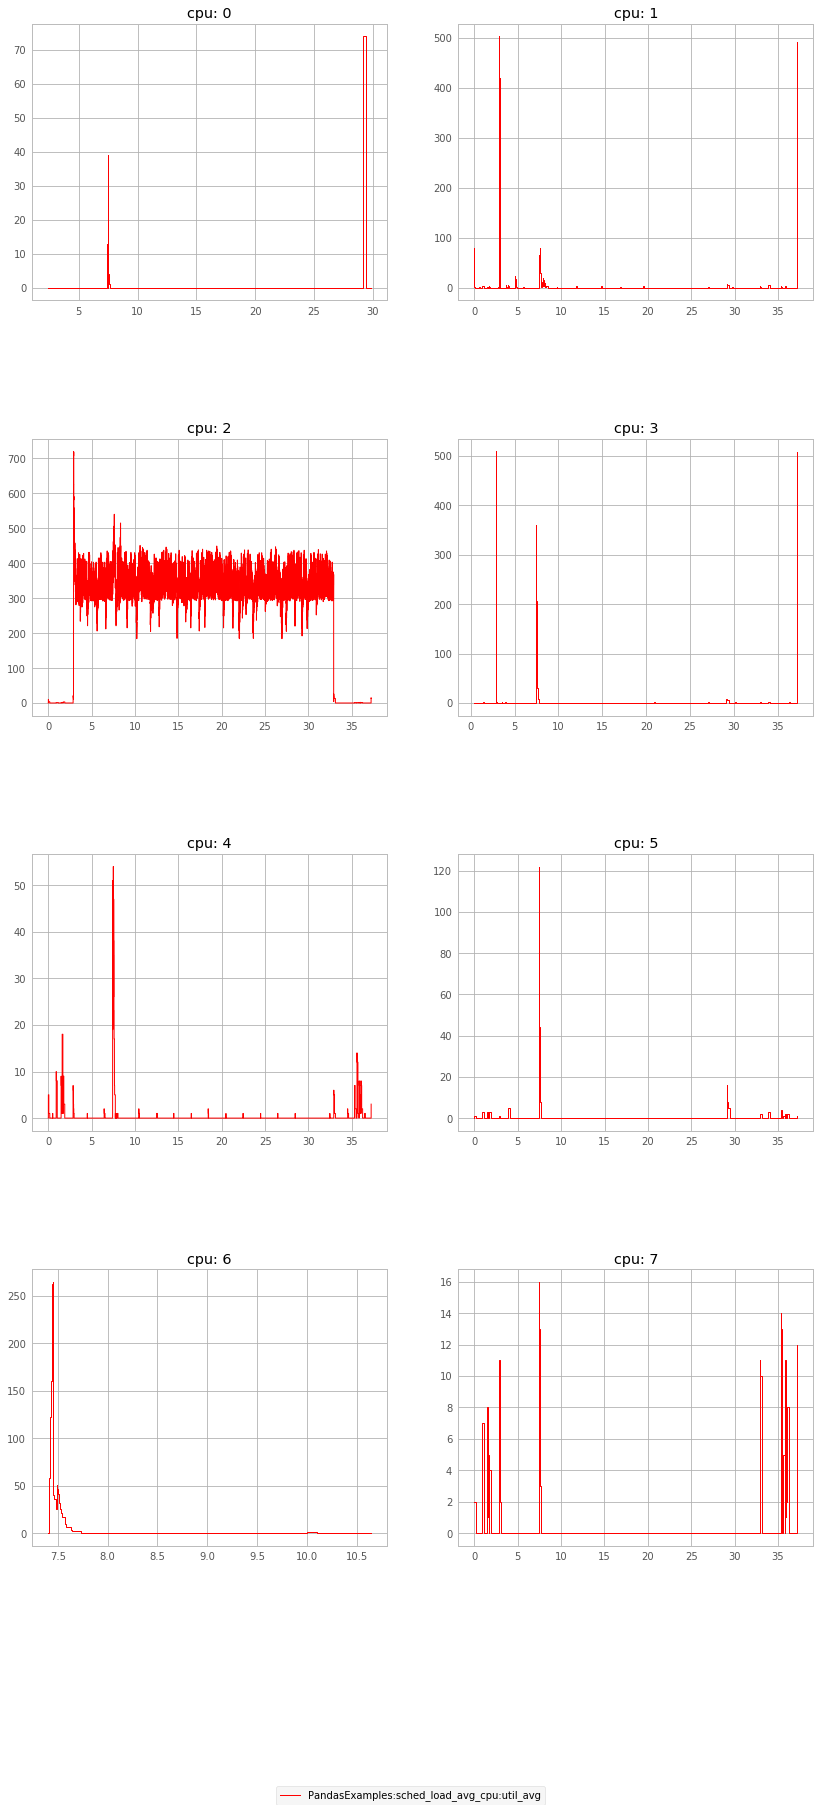

In [8]:
cpu_util_signals = [
    'sched_load_avg_cpu:util_avg',
]

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=['sched_load_avg_cpu'],
    window=(0,None))

trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [0,1,2,3,4,5,6,7]
    },
    drawstyle='steps-post',
).view()

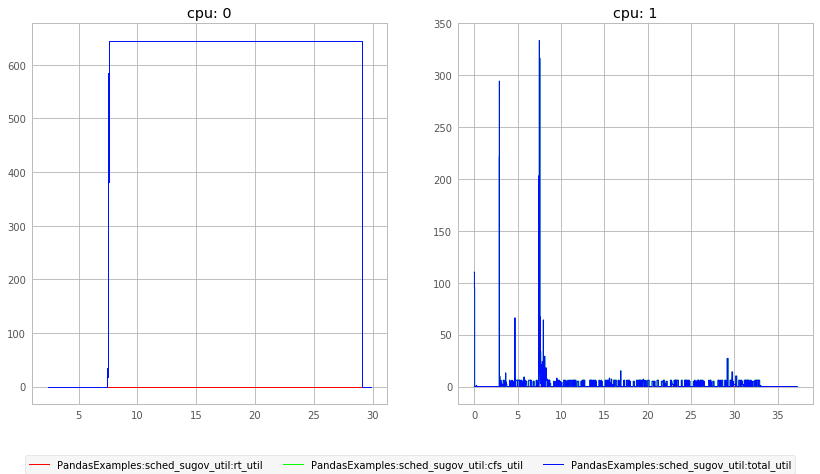

In [9]:
cpu_util_signals = [
    'sched_sugov_util:rt_util',
    'sched_sugov_util:cfs_util',
    'sched_sugov_util:total_util',
]

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=['sched_sugov_util'],
    window=(0,None))

trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [0, 1]
    },
    drawstyle='steps-post',
).view()

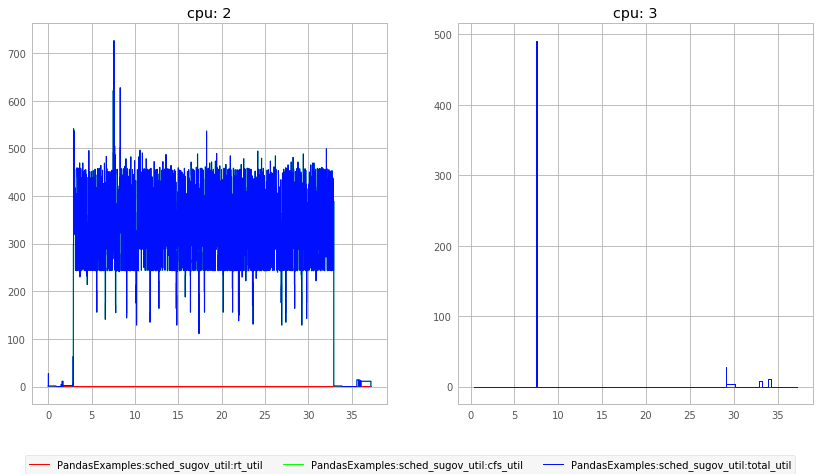

In [10]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [2, 3]
    },
    drawstyle='steps-post',
).view()

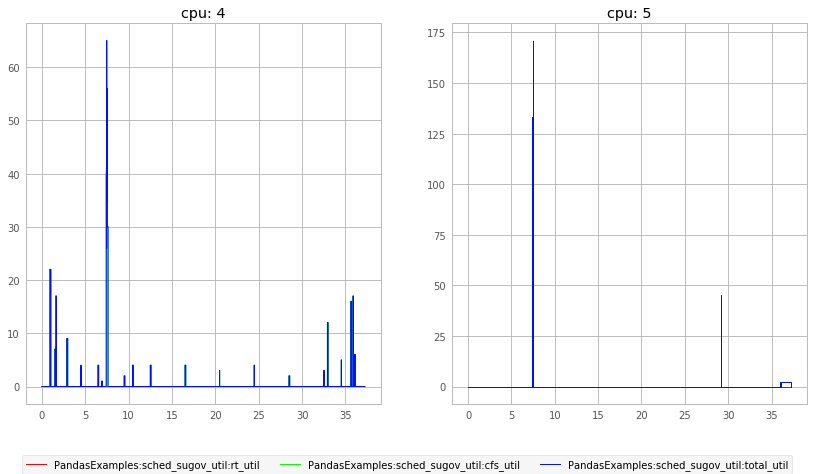

In [11]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [4, 5]
    },
    drawstyle='steps-post',
).view()

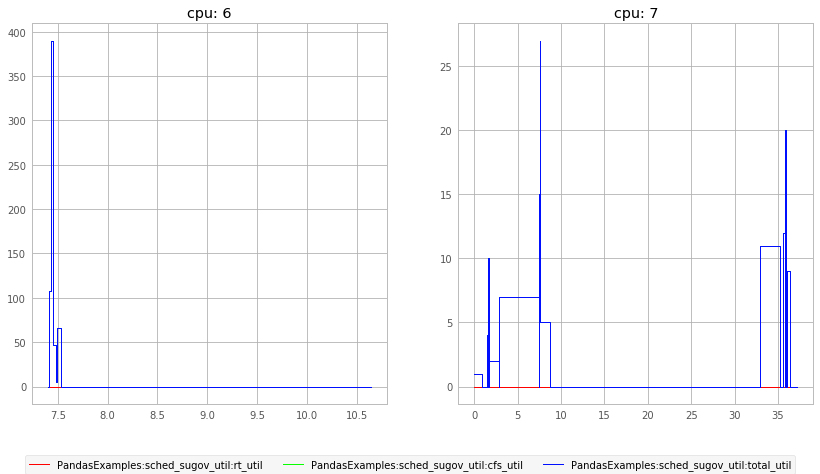

In [12]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [6, 7]
    },
    drawstyle='steps-post',
).view()

# Test case 2: Mainline Kernel

In [13]:
res_dir = '/home/leoy/Work2/Develop/wa-data/daniell'
trace_file = os.path.join(res_dir, "trace-v4.18-rc5.dat")

In [14]:
trace = Trace(hikey960_platform, trace_file, events=hikey960_conf['ftrace']['events'], normalize_time=True)

(1.2356631146153119, 0.9032683247675916)

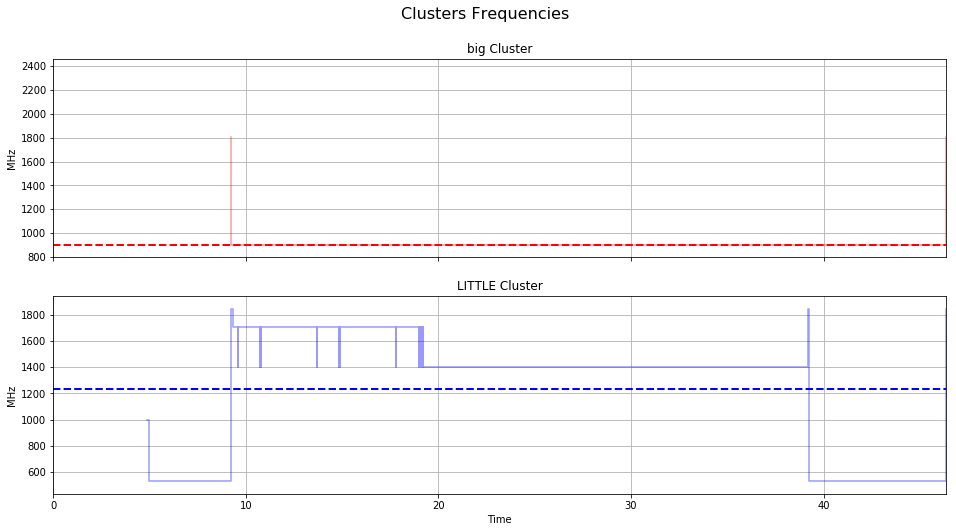

In [15]:
trace.analysis.frequency.plotClusterFrequencies()

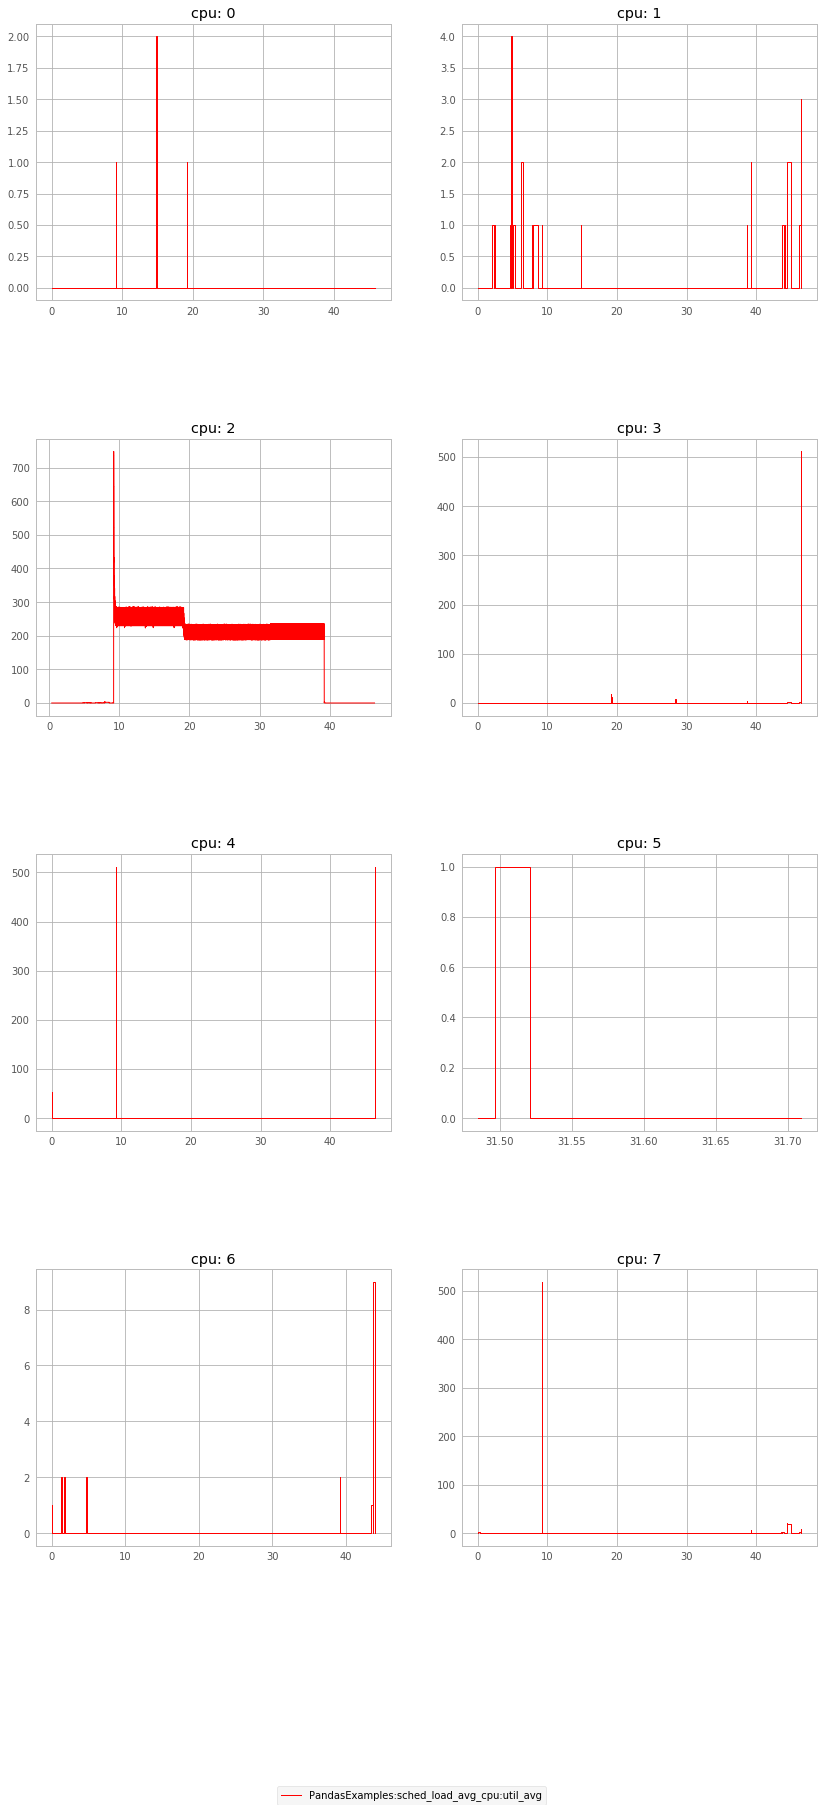

In [16]:
cpu_util_signals = [
    'sched_load_avg_cpu:util_avg',
]

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=['sched_load_avg_cpu'],
    window=(0,None))

trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [0,1,2,3,4,5,6,7]
    },
    drawstyle='steps-post',
).view()

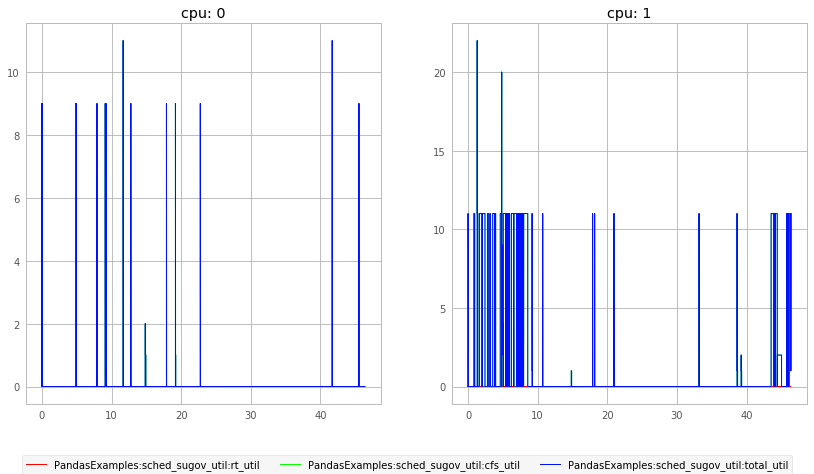

In [17]:
cpu_util_signals = [
    'sched_sugov_util:rt_util',
    'sched_sugov_util:cfs_util',
    'sched_sugov_util:total_util',
]

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=['sched_sugov_util'],
    window=(0,None))

trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [0, 1]
    },
    drawstyle='steps-post',
).view()

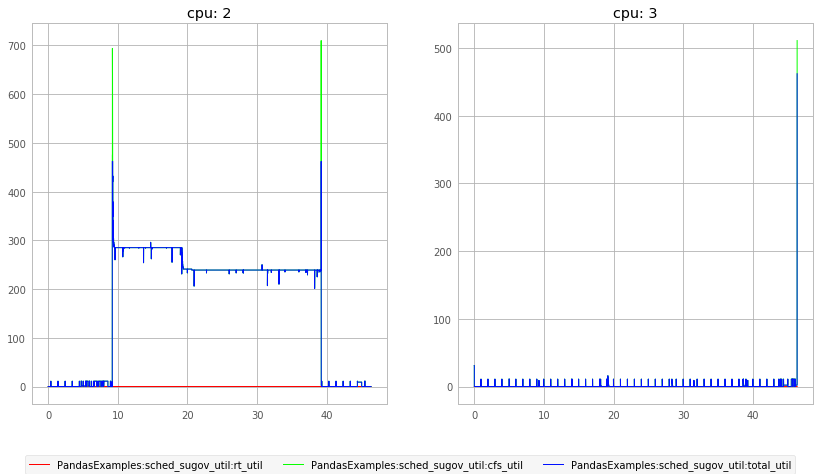

In [18]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [2, 3]
    },
    drawstyle='steps-post',
).view()

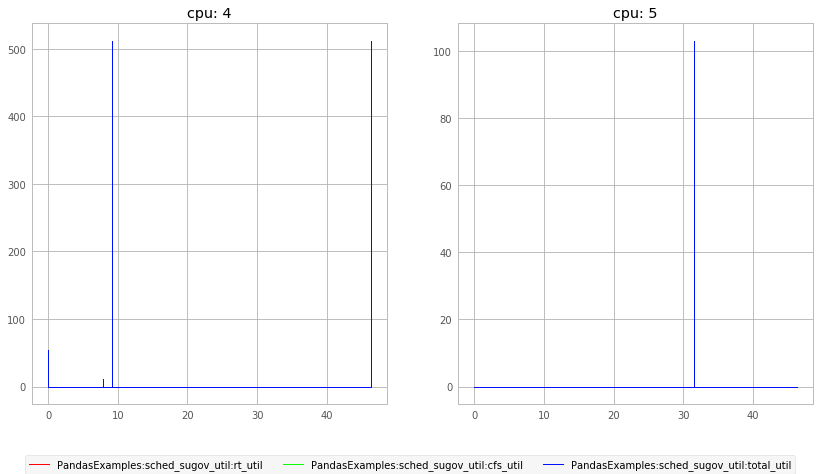

In [19]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [4, 5]
    },
    drawstyle='steps-post',
).view()

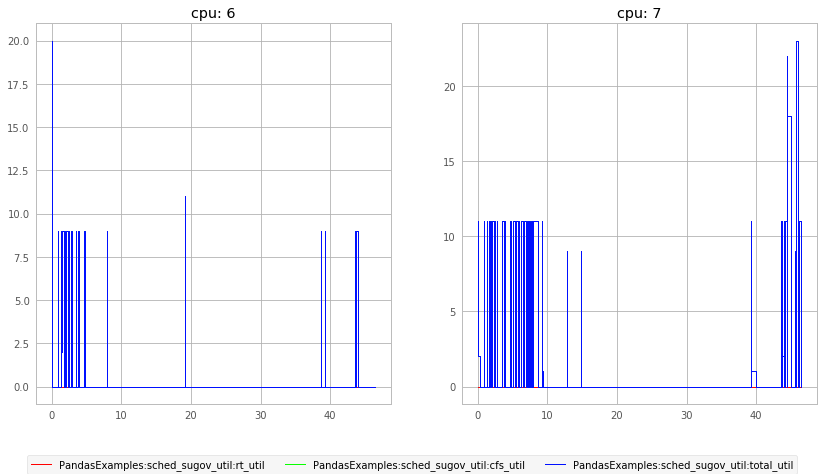

In [20]:
trappy.LinePlot(
    ftrace,
    signals=cpu_util_signals,
    pivot='cpu',
    filters = {
        'cpu' : [6, 7]
    },
    drawstyle='steps-post',
).view()